In [117]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

scale = 0.5
num_points = 1000

Plot functions

In [118]:
def draw_sphere(ax, P):

    # draw sphere
    u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="k", alpha=0.1)
    
    # plot every second as red and every other second as green
    ax.scatter(P[0,::2], P[1,::2], P[2,::2], color='r', s=1, alpha=0.5)
    ax.scatter(P[0,1::2], P[1,1::2], P[2,1::2], color='g', s=1, alpha=0.5)

    if P.shape[1]<3:
        ax.plot([0, P[0,0]], [0, P[1,0]], [0, P[2,0]], color='r')
        ax.plot([0, P[0,1]], [0, P[1,1]], [0, P[2,1]], color='g')
    # remove ticks
    ax.set_xticks([-1,1])
    ax.set_yticks([-1,1])
    ax.set_zticks([-1,1])
    ax.set_aspect('equal')
    ax.set_xlabel(r'$U_{\cdot,1}$',labelpad=0.01)
    ax.set_ylabel(r'$U_{\cdot,2}$',labelpad=0.01)
    ax.set_zlabel(r'$U_{\cdot,3}$',labelpad=0.01)

    ax.tick_params(axis="y", pad=0.01)
    ax.tick_params(axis="z", pad=0.01)
    ax.tick_params(axis="x", pad=0.01)

    # keep the three main axes but remove the gray area in the middle of the 3d plot
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.grid(False)
    
    return ax

def plot_coh_matrix(theta,ax):
    complex_vector = np.exp(1j*theta)
    coh_matrix = np.outer(complex_vector,complex_vector.conj())
    # coh_matrix = np.outer(np.cos(theta),np.cos(theta))+np.outer(np.sin(theta),np.sin(theta))
    ax.imshow(np.abs(coh_matrix), vmin=-1,vmax=1)
    # add numbers in text for each cell
    for i in range(3):
        for j in range(3):
            real_part = np.round(np.real(coh_matrix[i,j]),2)
            imag_part = np.round(np.imag(coh_matrix[i,j]),2)
            text_show = str(real_part)+'+\n'+str(imag_part)+'i'
            # if coh_matrix[i,j]>0:
            ax.text(j,i, text_show, ha='center', va='center', color='k', fontsize=8)
            # else:
            #     ax.text(j,i, text_show, ha='center', va='center', color='w', fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Comp. coherence map',fontsize=10)
    return coh_matrix

def plot_cos_coh_matrix(theta,ax):
    coh_matrix = np.outer(np.cos(theta),np.cos(theta))+np.outer(np.sin(theta),np.sin(theta))
    ax.imshow(coh_matrix, vmin=-1,vmax=1)
    # add numbers in text for each cell
    for i in range(3):
        for j in range(3):
            real_part = np.round(coh_matrix[i,j],2)
            text_show = str(real_part)
            if coh_matrix[i,j]>0:
                ax.text(j,i, text_show, ha='center', va='center', color='k', fontsize=8)
            else:
                ax.text(j,i, text_show, ha='center', va='center', color='w', fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Cos. coherence map',fontsize=10)
    # add colorbar below matrix
    cbar = plt.colorbar(ax.imshow(coh_matrix, vmin=-1,vmax=1), ax=ax, orientation='horizontal', ticks=[-1,0,1],fraction=0.046, pad=0.04)
    
    return coh_matrix

def plot_eigenvectors(ax1,ax2, coh_matrix):
    l,u = np.linalg.eig(coh_matrix)
    order = np.argsort(l)[::-1]

    ax1.barh(range(3), np.flip(u[:,order[0]]))
    ax1.set_yticks(range(3))
    ax1.set_yticklabels([r'$U_{1,3}$', r'$U_{1,2}$', r'$U_{1,1}$']);
    ax1.set_xticks([-1,0,1])
    ax1.set_xlabel(r'$\lambda_1=$'+str(np.round(l[order[0]],2)));
    ax1.set_title('Leading real\n eigenvector',fontsize=10)
    ax1.xaxis.label.set_color('red')
    ax1.spines['bottom'].set_color('red')
    ax1.spines['top'].set_color('red')
    ax1.spines['right'].set_color('red')
    ax1.spines['left'].set_color('red')
    ax1.axvline(0, color='k', linewidth=0.5)

    ax2.barh(range(3), np.flip(u[:,order[1]]))
    ax2.set_yticks(range(3))
    ax2.set_yticklabels([r'$U_{2,3}$', r'$U_{2,2}$', r'$U_{2,1}$']);
    ax2.set_xticks([-1,0,1])
    ax2.set_xlabel(r'$\lambda_2=$'+str(np.round(l[order[1]],2)));
    ax2.set_title('Trailing real\n eigenvector',fontsize=10)
    ax2.xaxis.label.set_color('green')
    ax2.spines['bottom'].set_color('green')
    ax2.spines['top'].set_color('green')
    ax2.spines['right'].set_color('green')
    ax2.spines['left'].set_color('green')
    ax2.axvline(0, color='k', linewidth=0.5)
    return u[:,order[0]],u[:,order[1]]

def plot_theta(ax,theta,title='Phases'):
    ax.barh(range(3), np.flip(theta))
    #add black line from top to buttom at 0
    ax.axvline(0, color='k', linewidth=0.5)
    ax.set_yticks(range(3))
    ax.set_yticklabels([r'$\theta_3$', r'$\theta_2$', r'$\theta_1$']);
    ax.set_xticks([-np.pi,0,np.pi], [r'$-\pi$','0',r'$\pi$']);
    ax.set_title(title,fontsize=10)   

def plot_cossin_theta(ax,theta,title='Phases'):
    ax.barh(range(3), np.flip(theta))
    #add black line from top to buttom at 0
    ax.axvline(0, color='k', linewidth=0.5)
    ax.set_yticks(range(3))
    ax.set_yticklabels(['', '', '']);
    ax.set_xticks([-1,0,1]);
    ax.set_title(title,fontsize=10)   

# def all_figs(theta,savename):

#     fig = plt.figure(figsize=(17,3))
#     width_ratio = 0.25
#     gs = fig.add_gridspec(1,7, height_ratios=[1], width_ratios=[width_ratio,0.5,width_ratio,width_ratio,1,1,1], wspace=0.3)
#     ax0 = fig.add_subplot(gs[0,0])
#     plot_theta(ax0,theta)
#     ax1 = fig.add_subplot(gs[0,1])
#     coh_matrix = plot_coh_matrix(theta,ax1)
#     ax2 = fig.add_subplot(gs[0,2])
#     ax3 = fig.add_subplot(gs[0,3])
#     u1,u2 = plot_eigenvectors(ax2,ax3,coh_matrix)
#     ax4 = fig.add_subplot(gs[0,4], projection='3d')
#     ax4 = draw_sphere(ax4,np.array((u1,u2)).T)
#     ax4.set_title('Subspace',fontsize=10)

#     u_all = np.zeros((3,2*num_points))
#     for n in range(num_points):
#         theta_random = np.array([theta[0]+np.random.uniform(low=-0.5,high=0.5)*scale,theta[1]+np.random.uniform(low=-0.5,high=0.5)*scale,theta[2]+np.random.uniform(low=-0.5,high=0.5)*scale])
#         # theta_random = np.array([theta[0]+np.random.randn()*scale,theta[1]+np.random.randn()*scale,theta[2]+np.random.randn()*scale])
#         coh_map = np.outer(np.cos(theta_random),np.cos(theta_random))+np.outer(np.sin(theta_random),np.sin(theta_random))
#         l,u = np.linalg.eig(coh_map)
#         order = np.argsort(l)[::-1]
#         u_all[:,2*n] = u[:,order[0]]
#         u_all[:,2*n+1] = u[:,order[1]]
        
#     ax5 = fig.add_subplot(gs[0,5], projection='3d')
#     ax5 = draw_sphere(ax5,u_all)
#     ax5.set_title('Subspace after adding\n noise to phases',fontsize=10)

#     ax6 = fig.add_subplot(gs[0,6], projection='3d')
#     ax6 = draw_sphere(ax6,u_all)
#     #view opposite
#     ax6.view_init(30, 30)

#     plt.savefig('figs/'+savename, bbox_inches='tight', dpi=300)

def all_figs_2(theta,savename):
    fig = plt.figure(figsize=(17,3))
    width_ratio = 0.25
    gs = fig.add_gridspec(2,8, height_ratios=[1,1], width_ratios=[width_ratio,width_ratio,width_ratio,0.5,width_ratio,width_ratio,1,1], wspace=0.4)
    ax0 = fig.add_subplot(gs[:,0])
    plot_theta(ax0,theta,title=r'Phases $\boldsymbol{\theta}$')
    ax1 = fig.add_subplot(gs[:,1])
    plot_cossin_theta(ax1,np.cos(theta),title=r'$\cos(\boldsymbol{\theta})$')
    ax2 = fig.add_subplot(gs[:,2])
    plot_cossin_theta(ax2,np.sin(theta),title=r'$\sin(\boldsymbol{\theta})$')
    ax3_0 = fig.add_subplot(gs[0,3])
    coh_matrix = plot_coh_matrix(theta,ax3_0)
    ax3_1 = fig.add_subplot(gs[1,3])
    coh_matrix = plot_cos_coh_matrix(theta,ax3_1)
    ax4 = fig.add_subplot(gs[:,4])
    ax5 = fig.add_subplot(gs[:,5])
    u1,u2 = plot_eigenvectors(ax4,ax5,np.real(coh_matrix))
    ax6 = fig.add_subplot(gs[:,6], projection='3d')
    ax6 = draw_sphere(ax6,np.array((u1,u2)).T)
    ax6.set_title('Real subspace',fontsize=10)

    u_all = np.zeros((3,2*num_points))
    for n in range(num_points):
        theta_random = np.array([theta[0]+np.random.uniform(low=-0.5,high=0.5)*scale,theta[1]+np.random.uniform(low=-0.5,high=0.5)*scale,theta[2]+np.random.uniform(low=-0.5,high=0.5)*scale])
        # theta_random = np.array([theta[0]+np.random.randn()*scale,theta[1]+np.random.randn()*scale,theta[2]+np.random.randn()*scale])
        coh_map = np.outer(np.cos(theta_random),np.cos(theta_random))+np.outer(np.sin(theta_random),np.sin(theta_random))
        l,u = np.linalg.eig(coh_map)
        order = np.argsort(l)[::-1]
        u_all[:,2*n] = u[:,order[0]]
        u_all[:,2*n+1] = u[:,order[1]]
        
    ax7 = fig.add_subplot(gs[:,7], projection='3d')
    ax7 = draw_sphere(ax7,u_all)
    ax7.set_title('Real subspace after\n adding noise to phases',fontsize=10)

    # ax6 = fig.add_subplot(gs[0,6], projection='3d')
    # ax6 = draw_sphere(ax6,u_all)
    # #view opposite
    # ax6.view_init(30, 30)

    plt.savefig('figs/'+savename, bbox_inches='tight', dpi=300)


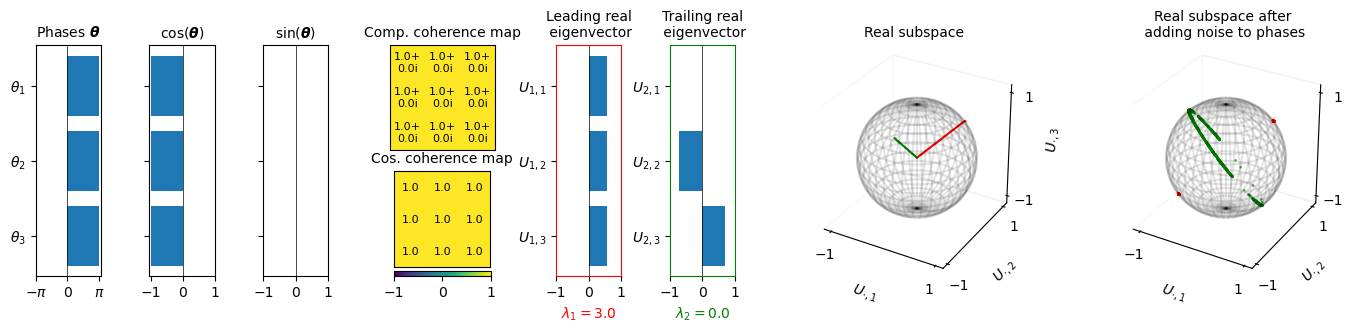

In [119]:
theta = np.array([np.pi,np.pi,np.pi])
all_figs_2(theta,savename='sphere_1')

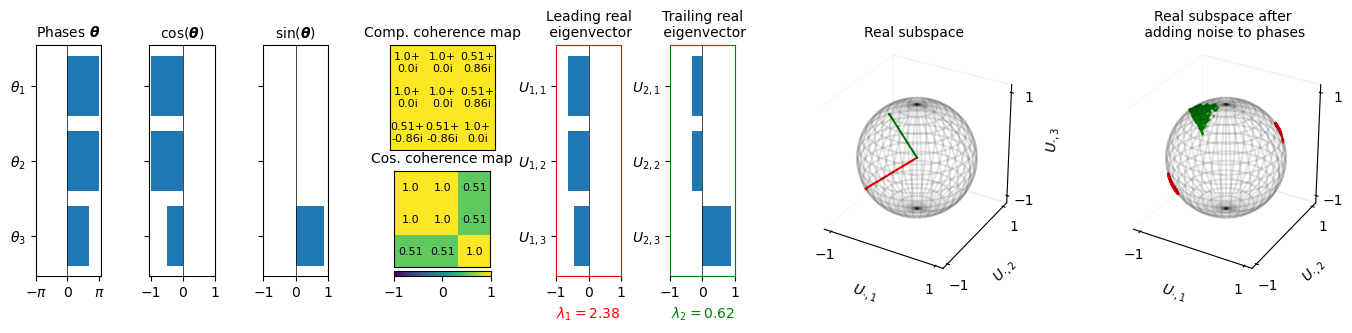

In [120]:
theta = np.array([np.pi,np.pi,0.67*np.pi])
all_figs_2(theta,savename='sphere_2')

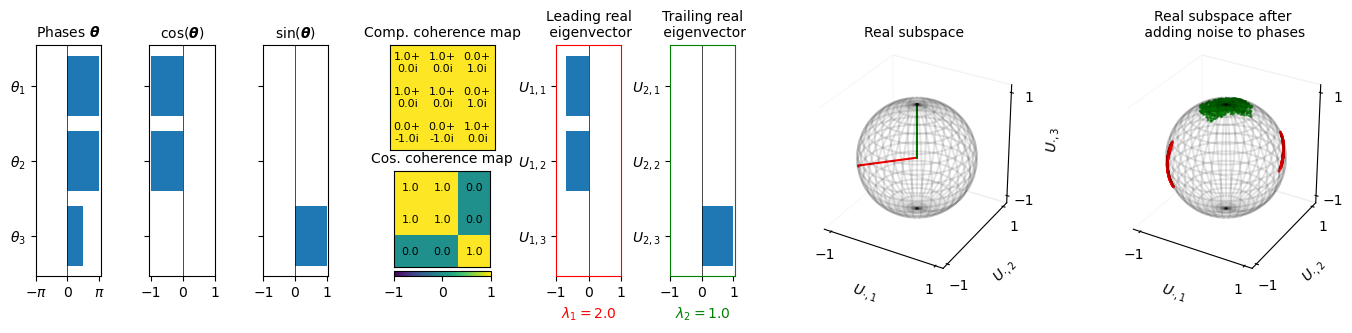

In [121]:
theta = np.array([np.pi,np.pi,np.pi/2])
all_figs_2(theta,savename='sphere_3')

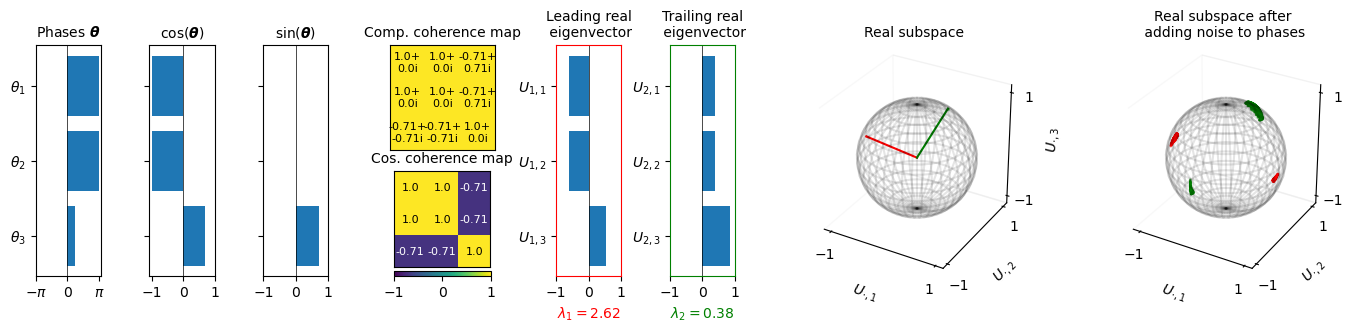

In [122]:
theta = np.array([np.pi,np.pi,np.pi/4])
all_figs_2(theta,savename='sphere_4')

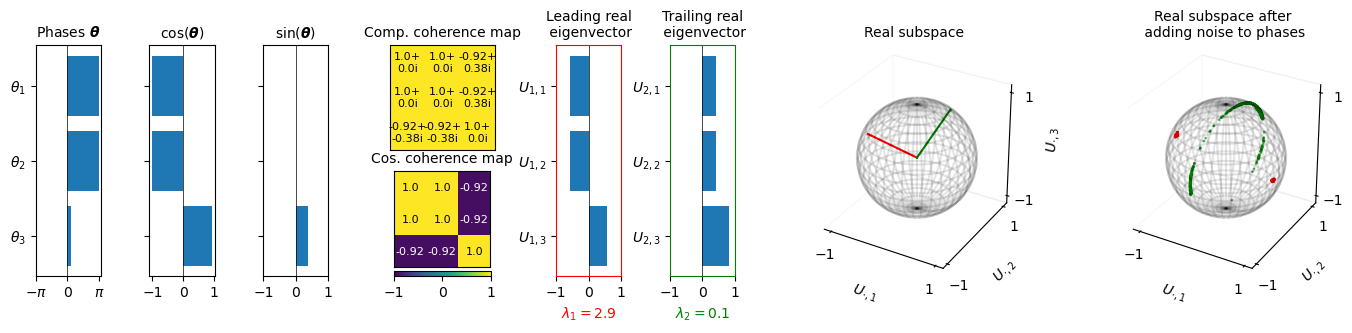

In [123]:
theta = np.array([np.pi,np.pi,np.pi/8])
all_figs_2(theta,savename='sphere_5')

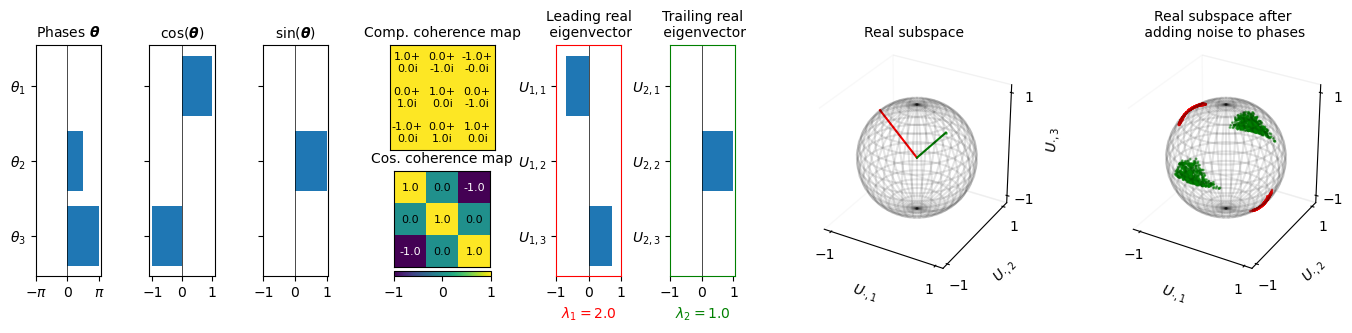

In [124]:
theta = np.array([0,np.pi/2,np.pi])
all_figs_2(theta,savename='sphere_6')

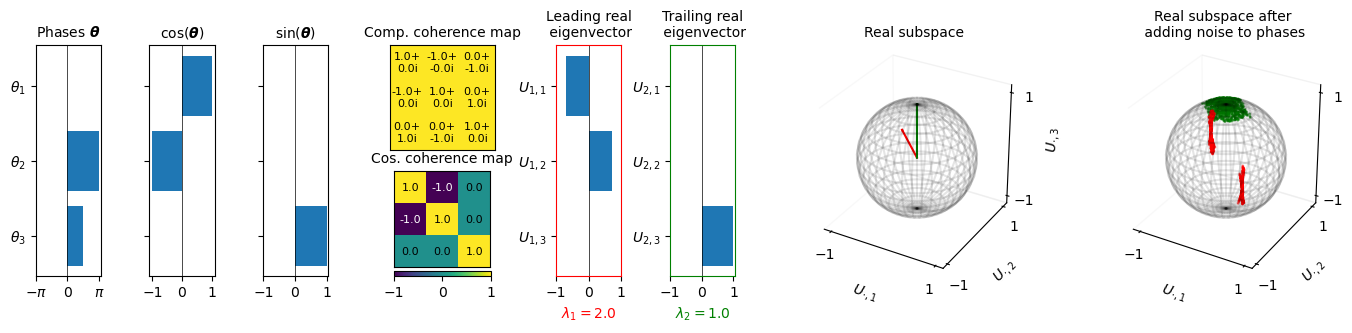

In [125]:
theta = np.array([0,np.pi,np.pi/2])
all_figs_2(theta,savename='sphere_7')

Text(0.5, 0.92, 'Great circle')

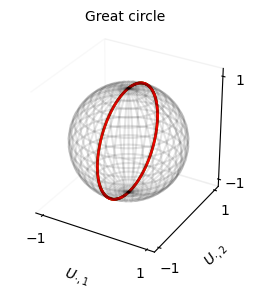

In [126]:
# great circle parameterization
mu = np.array([1,0,0]) #point on circle
# compute points on the great circle orthogonal to mu
v = np.array([0,1,0])
v = v - np.dot(v,mu)*mu
v = v/np.linalg.norm(v)
w = np.cross(mu,v)
theta = np.linspace(0,2*np.pi,num_points)
u_all = np.zeros((3,num_points))
for n in range(num_points):
    u_all[:,n] = np.cos(theta[n])*v+np.sin(theta[n])*w
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111, projection='3d')
ax = draw_sphere(ax,u_all)
ax.set_title('Great circle',fontsize=10)


In [127]:
x = np.array([0,0,1])
v = np.random.randn(3) #random point on circle
v = v/np.linalg.norm(v) 
v = v - np.dot(v,mu)*mu

In [128]:
x.T@v

0.29048877388472677

<Axes3D: title={'center': 'Great circle orthogonal to\n[0.57735027 0.57735027 0.57735027]'}, xlabel='$U_{\\cdot,1}$', ylabel='$U_{\\cdot,2}$', zlabel='$U_{\\cdot,3}$'>

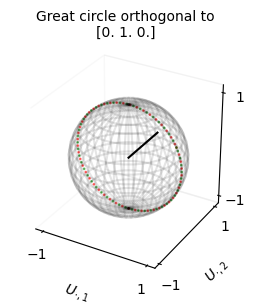

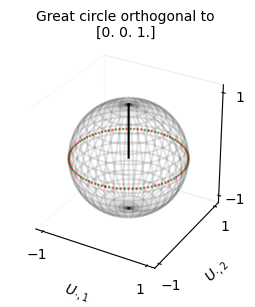

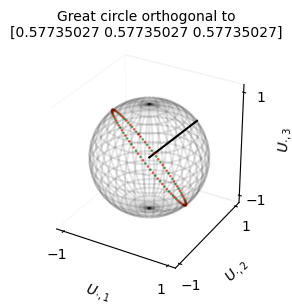

In [129]:
# make a function that takes as input a vector and returns the great circle orthogonal to it
def great_circle(x,num_points):
    x = x/np.linalg.norm(x) #ensure unit vector
    v = np.random.randn(3) #random point on circle
    v = v/np.linalg.norm(v) 
    v = v - np.dot(v,x)*x
    v = v/np.linalg.norm(v)
    w = np.cross(x,v)
    theta = np.linspace(0,2*np.pi,num_points)
    u_all = np.zeros((3,num_points))
    for n in range(num_points):
        u_all[:,n] = np.cos(theta[n])*v+np.sin(theta[n])*w
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111, projection='3d')
    ax = draw_sphere(ax,u_all)
    ax.set_title('Great circle orthogonal to\n'+str(x),fontsize=10)
    # add the input vector on the figure
    ax.plot([0, x[0]], [0, x[1]], [0, x[2]], color='k')
    return ax

great_circle(np.array([0,1,0]),100)
great_circle(np.array([0,0,1]),100)
great_circle(np.array([1,1,1]),100)